In [7]:
using Winston;using Color;


Use "AbstractVecOrMat{T}(" instead.


In [112]:
x=collect(1:200)*0.1;

In [133]:
x;

In [114]:
y=cos(x);

In [115]:
import DSP

In [116]:
z=DSP.Util.hilbert(y);

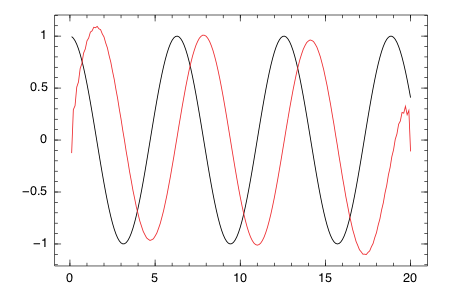

In [117]:
plot(x,y,x,imag(z))

In [ ]:
## TRAPEZOIDAL APP

In [193]:
Omega=0.1
ny=length(y)
imyt=zeros(ny)
for i=2:ny-1
    for j=2:ny-1
        if j!=i
            imyt[i]=imyt[i]-y[i]/(2*pi)*((1-cos(Omega*(x[j]-x[i])))/(x[j]-x[i]))
        end
        if rem(i,2)==0 && rem(j,2)==1
            #imyt[i]=imyt[i]+y[i]*(x[j+1]-x[j-1])/(2*pi)/(y[j]-y[i])
           imyt[i]=imyt[i]+y[i]/(pi)*((1-cos(Omega*(x[i]-x[j])))/(x[i]-x[j]))
            #imyt[i]=imyt[i]+y[i]/(2*pi)/(x[i]-x[j])
        elseif rem(i,2)==1 && rem(j,2)==0
            #imyt[i]=imyt[i]+y[i]*(x[j+1]-x[j-1])/(2*pi)/(y[j]-y[i])
            imyt[i]=imyt[i]+y[i]/(pi)*((1-cos(Omega*(x[i]-x[j])))/(x[i]-x[j]))
        #    #imyt[i]=imyt[i]+y[i]/(2*pi)/(x[i]-x[j])
        end
    end
    
end
#imyt=-imyt./(length(y)-1);

In [238]:
Omega=0.1
ny=length(y)
imyt=zeros(ny)
for i=2:ny-1
    m=minimum([i,ny-i+1])-1
    #println(m)
    for j=i-m+1:i+m-1
        if j!=i
            imyt[i]=imyt[i]+y[i]*(x[j+1]-x[j-1])/(2*pi)/abs(x[i]-x[j])
            #imyt[i]=imyt[i]-y[i]/(2*pi)*((1-cos(Omega*(x[j]-x[i])))/(x[j]-x[i]))
        end

    end
    
end

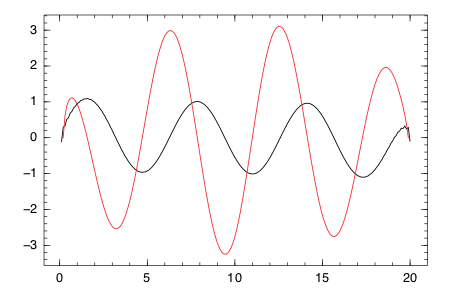

In [239]:
plot(x,imag(z),x,imyt)